## Inverse Kinematics for a Rotary Stewart Platform

This page will show you how, given the (diagonal) inertia tensor and mass for your loaded motion platform, the accelerations and rotations you requested for your platform to undergo, and the directions of the connecting rods between the platform and the motor (solved in another notebook), you can obtain the forces in each connecting rod, and eventually the torques needed in each of the 6 motors. This is imperative when designing your platform so that you choose motors that can perform appropriately.

### Newton's Laws

We will be using Newton's 2nd law to solve the inverse kinematics problem. There are 6 connecting rods attached to the motion base. 

$$ \sum{\vec{F_i}} = m\vec{a}$$

This vector equation can be broken down into three components.

$$\sum{F_i \hat{e}_i \cdot \hat{\imath}} = m\ddot{x}$$

$$ \sum{F_i \hat{e}_i \cdot \hat{\jmath}} = m\ddot{y}$$

$$ \sum{F_i \hat{e}_i \cdot \hat{k}} = m\ddot{z}$$

We can also write an equation for the moment balance on the platform, taken about the center of mass of the platform. We will denote by $\vec{r}_{i/g}$ the vector connecting the platform's center of mass to each force application point. We can then write the 6 moments caused by each of the 6 connecting rod forces (connecting rods are two-force members) as:

$$\sum \vec{r}_{i/g} \times  \left( F_i \hat{e}_i \right) = {J}\vec{\ddot{\theta}}  $$

This equation, too, can be broken up into components by $x,y,z$ directions, assuming that we are taking moments about principle axes $x,y,z$ (off-diagonal terms in the inertia tensor are 0).

$$ \sum \vec{r}_{i/g} \times  \left( F_i \hat{e}_i \right)\cdot \hat{\imath} = {J_{xx}}\ddot{\theta}_x  $$

$$ \sum \vec{r}_{i/g} \times  \left( F_i \hat{e}_i \right)\cdot \hat{\jmath} = {J_{yy}}\ddot{\theta}_y  $$

$$ \sum \vec{r}_{i/g} \times  \left( F_i \hat{e}_i \right)\cdot \hat{k} = {J_{zz}}\ddot{\theta}_z  $$

Because we have 6 equations (3 for force balance, 3 for moment balance), and we have six unknowns (the connecting rod force magnitudes $F_i$), we can reform the problem as a matrix equation.

$$ \begin{bmatrix}  
\hat{e}_1 \cdot \hat{\imath} & \hat{e}_2 \cdot \hat{\imath}  & \hat{e}_3 \cdot \hat{\imath} & \hat{e}_4 \cdot \hat{\imath} & \hat{e}_5 \cdot \hat{\imath} & \hat{e}_6 \cdot \hat{\imath} \\
\hat{e}_1 \cdot \hat{\jmath} & \hat{e}_2 \cdot \hat{\jmath}  & \hat{e}_3 \cdot \hat{\jmath} & \hat{e}_4 \cdot \hat{\jmath} & \hat{e}_5 \cdot \hat{\jmath} & \hat{e}_6 \cdot \hat{\jmath} \\
\hat{e}_1 \cdot \hat{k} & \hat{e}_2 \cdot \hat{k}  & \hat{e}_3 \cdot \hat{k} & \hat{e}_4 \cdot \hat{k} & \hat{e}_5 \cdot \hat{k} & \hat{e}_6 \cdot \hat{k} \\
\left( \vec{r}_{1/g} \times  \hat{e}_1\right) \cdot \hat{\imath}  & \left( \vec{r}_{2/g} \times  \hat{e}_2 \right)\cdot \hat{\imath}  & \left( \vec{r}_{3/g} \times  \hat{e}_3 \right)\cdot \hat{\imath}  & \left( \vec{r}_{4/g} \times  \hat{e}_4\right) \cdot \hat{\imath}  & \left( \vec{r}_{5/g} \times  \hat{e}_5\right) \cdot \hat{\imath}  & \left( \vec{r}_{6/g} \times  \hat{e}_6\right) \cdot \hat{\imath}  \\
\left( \vec{r}_{1/g} \times  \hat{e}_1 \right)\cdot \hat{\jmath}  & \left(\vec{r}_{2/g} \times  \hat{e}_2 \right)\cdot \hat{\jmath}  & \left( \vec{r}_{3/g} \times  \hat{e}_3\right) \cdot \hat{\jmath}  & \left( \vec{r}_{4/g} \times  \hat{e}_4  \right)\cdot \hat{\jmath} & \left( \vec{r}_{5/g} \times  \hat{e}_5\right) \cdot \hat{\jmath}  & \left( \vec{r}_{6/g} \times  \hat{e}_6 \right)\cdot \hat{\jmath}  \\
\left( \vec{r}_{1/g} \times \hat{e}_1\right) \cdot \hat{k}  & \left( \vec{r}_{2/g} \times  \hat{e}_2\right) \cdot \hat{k}  & \left( \vec{r}_{3/g} \times  \hat{e}_3\right) \cdot \hat{k}  & \left( \vec{r}_{4/g} \times  \hat{e}_4 \cdot \right)\hat{k}  & \left( \vec{r}_{5/g} \times  \hat{e}_5 \right)\cdot \hat{k}  & \left( \vec{r}_{6/g} \times  \hat{e}_6\right) \cdot \hat{k}  \\
\end{bmatrix} \begin{bmatrix}F_1 \\ F_2 \\ F_3 \\ F_4 \\ F_5 \\ F_6 \end{bmatrix} = \begin{bmatrix} m\ddot{x} \\ m\ddot{y} \\ m\ddot{z}+mg \\ J_{xx}\ddot{\theta}_x \\ J_{yy}\ddot{\theta}_y \\ J_{zz}\ddot{\theta}_z \end{bmatrix}$$

This equation is in the classic $Ax=b$ form, and can be solved using linear algebra. If the matrix $A$ is not invertible (if the determinant is zero), it indicates that the forces and moments we require for the motion base cannot be reacted by the connecting rods. This, if encountered, would indicate a design issue.

Once we have the magnitudes of the connecting rod forces, we can find the torque required for the motor. We know that the moment about $O$ due to the con-rod force will be:

$$\vec{M}_i = \vec{r}_{Q/O,i} \times \vec{F}_i$$

But this gives us a total moment in the global $XYZ$ coordinate system. To get the moment that the motor will have to react, we need to find the component of this moment that is in the same direction as the motor's axis of rotation. Simply put, we can do this using a dot product if we have a unit vector describing the motor's axis (which we do). We will call this unit vector $\hat{e}_{m,i}$ and we then get the required motor torque to be:

$$M_i = \left(\vec{r}_{Q/O,i} \times \vec{F}_i\right)\cdot \hat{e}_{m,i}$$

the motor's unit vector is easily obtained by considering its yaw angle with respect to the global $XYZ$ coordinate system as:

$$\hat{e}_{m,i} = \left[ \cos \psi_{m,i},\sin \psi_{m,i},0\right]^T$$

Once this dot product is computed, we can produce motor performance curves by plotting  $\left|M_i\right|$ vs. $\frac{d\theta_{m,i}}{dt}$ and picking a motor whose torque-omega curve encompasses our required performance curve with some factor of safety.

## Putting this into practice

In order to show this procedure in action, we will have to simulate the entire pipeline of the motion base's operation from vehicle inputs all the way to the torques on each motor. This requires a few steps.

1. Take steering and other vehicle inputs we are likely to see and generate vehicle state trajectories. Alternatively, load vehicle states from data acquired on a real vehicle.
2. Take these vehicle states, scale them, and apply low and high pass filters to each channel to generate platform trajectories.
3. Compute the necessary derivatives of the platform trajectories to feed into the inverse kinetic model
4. perform the kinetic analysis

## Vehicle States

To generate vehicle states, we will use a model I built in Python that assumes a planar vehicle (no roll/pitch) with a constant-horsepower engine and a nonlinear, physics-based tire model. We'll use most of the default parameters, and the "autopilot" feature which allows us to define a road geometry and speed limit profile, and let the vehicle drive itself as it tries to stay on the road. We'll simulate a vehicle accelerating to $20 \frac{m}{s}$ and then performing a 4 meter lane change over the course of 3 seconds. This is fairly moderate driving for the most part.

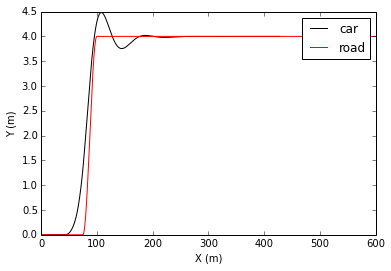

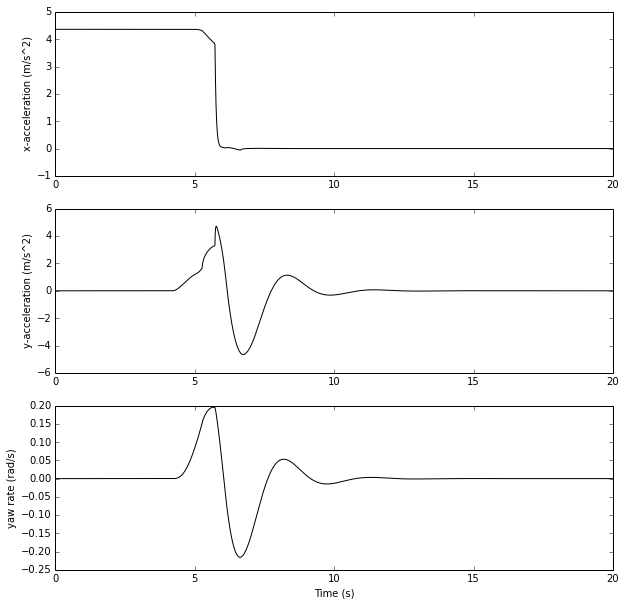

In [20]:
%matplotlib inline
from motionbase import MotionBase #this is the motion base "class" which holds the base's relevant variables and utility functions
from matplotlib.pyplot import *
from numpy import *
from DugoffBicycleModel import DugoffBicycleModel

#initialize a car using the Dugoff Bicycle Model class which is in this directory.
car = DugoffBicycleModel(autopilot_gain=.005,dT=0.01)
#initialize the lateral position of the car.
car.x[0] = 0.5
#how long will we simulate the car for?
simtime = 20

#now we will build a road upon which the car should drive. We will define a road by an X, a Y, an S, and a speed profile.
granularity = .25 #meter. How much distance in between road points.
roadlength = 600
#global XY position of the road
roadx = arange(0,roadlength,granularity)
roady = zeros(len(roadx))
#now a speed profile. Make it constant for now.
speedlimit =25 #m/s
roadspeed = speedlimit*ones(len(roadx))
#now put in a lane change halfway down the road that will last 2 sec
lanewidth = 4 #meters
LC_time = 1 #seconds
LC_x = arange(0,speedlimit*LC_time,granularity) #this is how long in the x-direction the lane change should take
LC_y = lanewidth/2*(1-cos(LC_x*(pi/(speedlimit*LC_time))))
roady[roadlength/2:roadlength/2+len(LC_x)] = LC_y
roady[roadlength/2+len(LC_x):]=lanewidth

#now let's simulate the car driving on said road with the simple steering autopilot
t = arange(0,simtime,car.dT)
#we will use the "farthest ahead" point that the car can "see" to drive the simple autopilot.
xvec = car.x
xdotvec = array([0,0,0,0,0,0])#initialize state derivatives.
tpreview = 3.0 #seconds
Nsteps = 1 #prediction horizon 
preview_time = tpreview*Nsteps #seconds
#initialize that we are stomping on the gas full force.
brake,gas,steer = 0,1,0
#initialize a vector to store autopilot steer angles
steervec = zeros(len(t))

for ind in range(1,len(t)):
    #print ind
    #first look up the y of the road
    if car.x[3]==0:
        #if car is not moving, pretend that it is so that preview vector doesn't go crazy.
        preview_dist_vector = arange(0,(Nsteps)*preview_time)*0.1
    else:
        preview_dist_vector = arange(0,(Nsteps)*preview_time)*car.x[3]

    #now figure out what the previewed vector of road y-positions is. Use interpolation for this.
    roadvec = interp(car.x[2]+preview_dist_vector,roadx,roady,left=0,right=0)
    speedvec = interp(car.x[2]+preview_dist_vector,roadx,roadspeed,left=0,right=0)
    if len(roadvec)<Nsteps:
        roadvec = roady[-1]*ones(len(preview_dist_vector))
        speedvec = speedlimit*ones(len(preview_dist_vector))
    #print len(preview_dist_vector)

    #update car. use a simple lookahead "lever arm" to pass as a path error.
    x,xdot = car.euler_update(steer=0,gas=0,brake=0,cruise='on',autopilot='on',setspeed=speedvec[-1],patherror=(roadvec[-1]-(car.x[0]+preview_dist_vector[-1]*sin(car.x[4]))))
    xvec = vstack((xvec,x))#update the stored states
    xdotvec = vstack((xdotvec,xdot))#update the stored state derivatives.

#The x-accel is the 4th row in the state derivative vector.
a_x = xdotvec[:,3]
#the lateral accel is Vdot+U*r
a_y = xdotvec[:,1]+xvec[:,3]*xvec[:,5]
#because the car model is planar, we can't get much info about any of the other states except yaw rate
yawrate = xvec[:,5]

#plot the path of the car
figure()
plot(xvec[:,2],xvec[:,0],'k',roadx,roady,'r')
xlabel('X (m)')
ylabel('Y (m)')
legend(['car','road'])

#plot the states we've stored for our motion base simulation
figure(figsize=(10,10))
subplot(3,1,1)
plot(t,a_x,'k')
ylabel('x-acceleration (m/s^2)')
subplot(3,1,2)
plot(t,a_y,'k')
ylabel('y-acceleration (m/s^2)')
subplot(3,1,3)
plot(t,yawrate,'k')
xlabel('Time (s)')
ylabel('yaw rate (rad/s)')


As you can see, we were able to generate accelerations and a yaw rate for the simulated vehicle under a standard maneuver set. This will allow us to feed into the low and high pass filters for the motion platform, generate a vector of poses, and complete our kinetic analysis.

To do:

* Create some vector of states to go into the model
* Create the HP/LP pairs for each channel.
* Create a function to calculate the force in each conrod
* Create a function to calculate the motor torque
* Create a function to plot motor demand